Este cuaderno de ipython es propiedad de:
El laboratorio de Diseño de Fármacos de Concepción. En convenio con:
Datagen Limitada, Chile.
* Autor : Dr. Alexis Salas Burgos
* Fecha : Noviembre 2015
* Versión: 1.0

Requerimientos Enviromental bio (pip install):
* mdtraj
* tables
* prody
* scipy

In [15]:
%pylab inline 
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
from prody import parsePDB, parseDCD
import scipy.cluster.hierarchy
import os

Populating the interactive namespace from numpy and matplotlib


In [216]:
directorio_work = "/Users/alsalas/Desktop/UreI_pH6/"
os.chdir(directorio_work)

In [217]:
def get_linkage(dcd, pdb):
    traj = md.load(dcd, top=pdb)
    traj = traj[500::10]
    distances = np.empty((traj.n_frames, traj.n_frames))
    for i in range(traj.n_frames):
        distances[i] = md.rmsd(traj, traj, i)
    print('Max pairwise rmsd: %f nm' % np.max(distances))
    linkage = scipy.cluster.hierarchy.ward(distances)
    return linkage

In [225]:
dcd ='UreI_pH6_cadF.dcd'
pdb ='UreI_pH6_cadF.pdb'
linkage = get_linkage(dcd, pdb)

Max pairwise rmsd: 0.316742 nm


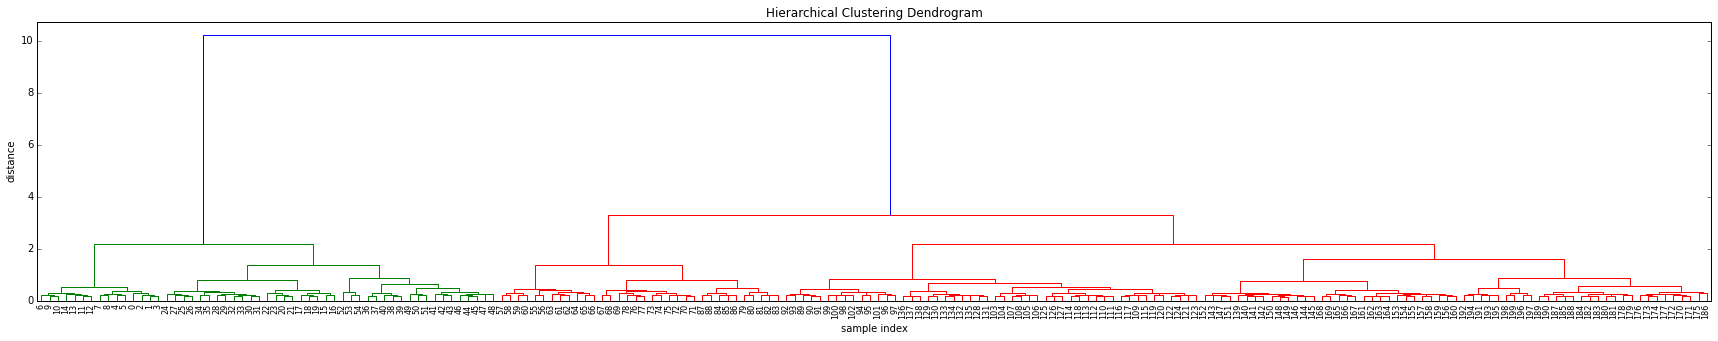

In [226]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(30, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ddata = dendrogram(
    linkage,
     no_labels=False,
    count_sort='descendent',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

pylab.savefig("Hcluster_RMSD_F.svg", dpi=200)
pylab.savefig("Hcluster_RMSD_F.png", dpi=200)
None

In [227]:
print ddata.keys()
cluster1 = [ddata["leaves"][0]]
cluster2 = []
cluster3 = []
for i,color in enumerate(ddata["color_list"]):
    if color == 'g':
        cluster1.append(ddata["leaves"][i+1])
    if color == 'r':
        cluster2.append(ddata["leaves"][i+1])
    if color == 'c':
        cluster3.append(ddata["leaves"][i+1])
cluster2.append(ddata["leaves"][-1])

print cluster1
print cluster2
print cluster3

['ivl', 'dcoord', 'leaves', 'color_list', 'icoord']
[6, 9, 10, 14, 13, 11, 12, 7, 8, 4, 5, 0, 2, 1, 3, 24, 27, 25, 26, 34, 35, 28, 29, 32, 33, 30, 31, 22, 23, 20, 21, 17, 18, 19, 15, 16, 52, 53, 54, 36, 37, 40, 38, 39, 49, 50, 51, 41, 42, 43, 46, 44, 45, 47, 48]
[57, 58, 59, 60, 55, 56, 63, 61, 62, 64, 65, 66, 67, 68, 69, 78, 76, 77, 73, 74, 75, 72, 70, 71, 87, 88, 84, 85, 86, 79, 80, 81, 82, 83, 92, 93, 89, 90, 91, 99, 100, 98, 102, 94, 95, 101, 96, 97, 136, 137, 138, 129, 130, 133, 134, 132, 135, 128, 131, 103, 104, 107, 108, 105, 106, 125, 126, 127, 114, 118, 113, 112, 110, 111, 116, 117, 109, 115, 119, 120, 122, 124, 121, 123, 152, 143, 147, 151, 139, 140, 141, 142, 150, 148, 149, 146, 144, 145, 168, 169, 165, 166, 167, 161, 162, 163, 164, 153, 154, 155, 157, 158, 159, 156, 160, 192, 194, 191, 193, 195, 198, 199, 196, 197, 189, 190, 187, 185, 188, 184, 182, 183, 180, 181, 178, 179, 176, 173, 174, 177, 172, 170, 171, 175, 186]
[]


# Calculo de centroide / Average

In [221]:
def get_centroide(traj):
    atom_indices = [a.index for a in traj.topology.atoms if a.element.symbol != 'H']
    distances = np.empty((traj.n_frames, traj.n_frames))
    for i in range(traj.n_frames):
        distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices)
    
    beta = 1
    index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
    print(index)
    
    centroid = traj[index]
    return centroid

In [228]:
traj_cluster1 = traj[cluster1]
traj_cluster2 = traj[cluster2]
traj_cluster3 = traj[cluster3]

In [229]:
centroide1 = get_centroide(traj_cluster1)
centroide2 = get_centroide(traj_cluster2)
#centroide3 = get_centroide(traj_cluster3)
centroide1.save_pdb("UreI_pH6_CadF_c1.pdb")
centroide2.save_pdb("UreI_pH6_CadF_c2.pdb")
#centroide3.save_pdb("UreI_pH6_CadE_c3.pdb")

16
16


In [33]:
from scipy.cluster.hierarchy import fcluster
fcluster(linkage, 8, depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [39]:
from scipy.cluster.hierarchy import fcluster
max_d = 30
clusters = fcluster(linkage, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

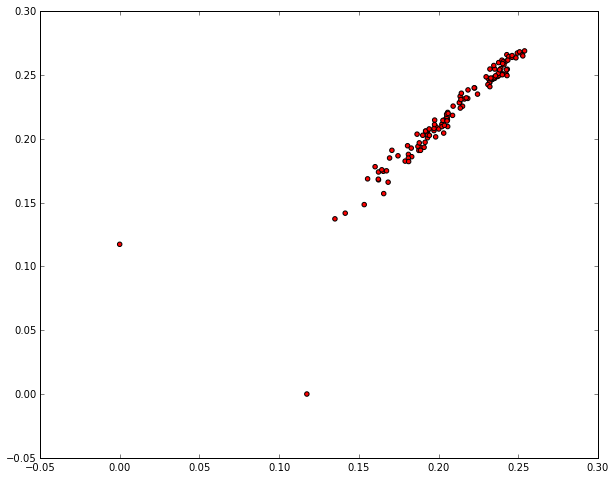

In [40]:
plt.figure(figsize=(10, 8))
plt.scatter(distances[:,0], distances[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors